Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

----

In [151]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [152]:
data_tesis=pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
data_orders=pd.read_csv('/datasets/orders_us.csv')
data_visitor=pd.read_csv('/datasets/visits_us.csv')


In [153]:
print(data_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None


In [154]:
print(data_tesis.head())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


In [155]:
data_orders_A=data_orders.query("group=='A'")
data_orders_B=data_orders.query("group=='B'")
set_a = set(data_orders_A['visitorId'])
set_b =set(data_orders_B['visitorId'])
usuarios_duplicados= set_a.intersection(set_b)
data_orders=data_orders[~data_orders['visitorId'].isin(usuarios_duplicados)]
data_orders=data_orders.reset_index(drop=True)
print(data_orders.head(20))


    transactionId   visitorId        date  revenue group
0      3667963787  3312258926  2019-08-15     30.4     B
1      2804400009  3642806036  2019-08-15     15.2     B
2      3797467345  1196621759  2019-08-15    155.1     B
3      2282983706  2322279887  2019-08-15     40.5     B
4       182168103   935554773  2019-08-15     35.0     B
5       398296753  2900797465  2019-08-15     30.6     B
6      2626614568    78758296  2019-08-15     20.1     A
7      1576988021   295230930  2019-08-15    215.9     A
8      1506739906  1882260405  2019-08-15     30.5     B
9      3649131742   879864040  2019-08-15     65.7     A
10     1919444843   927791387  2019-08-15     70.2     B
11     2809384911  3213223594  2019-08-15    115.4     A
12     3044797713   728063420  2019-08-15    185.4     B
13     3859315276  1565034404  2019-08-15    170.9     A
14     2550768810  2742574263  2019-08-15    235.0     B
15     1820531107  2973109265  2019-08-15     20.3     B
16     1108180333   222718357  

In [156]:
data_tesis['ICE']=(data_tesis['Impact']*data_tesis['Confidence'])/data_tesis['Effort']

In [157]:
print(data_tesis[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


Conclusiones : La Hypothesis que se debe priorizar acorde al Calculo ICE es la de de "Launch a promotion that gives users discounts"

In [158]:
data_tesis['RICE']=(data_tesis['Reach']*data_tesis['Impact']*data_tesis['Confidence'])/data_tesis['Effort']

In [159]:
print(data_tesis[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Conclusiones : La Hypothesis que se debe priorizar acorde al Calculo RICE es la de de "Add a subscription form to all the main pages"

In [160]:
print(data_tesis[['Hypothesis','RICE','ICE']].sort_values(by='RICE',ascending=False))

                                          Hypothesis   RICE        ICE
7  Add a subscription form to all the main pages....  112.0  11.200000
2  Add product recommendation blocks to the store...   56.0   7.000000
0  Add two new channels for attracting traffic. T...   40.0  13.333333
6  Show banners with current offers and sales on ...   40.0   8.000000
8  Launch a promotion that gives users discounts ...   16.2  16.200000
3  Change the category structure. This will incre...    9.0   1.125000
1  Launch your own delivery service. This will sh...    4.0   2.000000
5  Add a customer review page. This will increase...    4.0   1.333333
4  Change the background color on the main page. ...    3.0   1.000000


Conclusiones: El comparativo nos muestra como cambia el orden de las diferentes hyphotesis cuando se utilizan las diferentes metodos de priorizacion de hyphotesis 

In [161]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1016 non-null   int64  
 1   visitorId      1016 non-null   int64  
 2   date           1016 non-null   object 
 3   revenue        1016 non-null   float64
 4   group          1016 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 39.8+ KB


In [162]:
data_visitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [163]:
data_orders['date'] = data_orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [164]:
data_visitor['date'] = data_visitor['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [165]:
group_data=data_orders[['date','group']].drop_duplicates()

orders_agrega=group_data.apply(lambda x: data_orders[np.logical_and(data_orders['date'] <= x['date'], data_orders['group'] == x['group']
        )].agg({'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',}),axis=1,).sort_values(by=['date', 'group'])

visitor_agrega=group_data.apply(lambda x: data_visitor[np.logical_and(data_visitor['date'] <= x['date'], data_visitor['group'] == x['group']
        )].agg({'date': 'max',
            'group': 'max',
            'visits': 'sum'}),axis=1,).sort_values(by=['date', 'group'])

data_acumulativa=orders_agrega.merge(visitor_agrega,left_on=['date', 'group'], right_on=['date', 'group'])
data_acumulativa.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

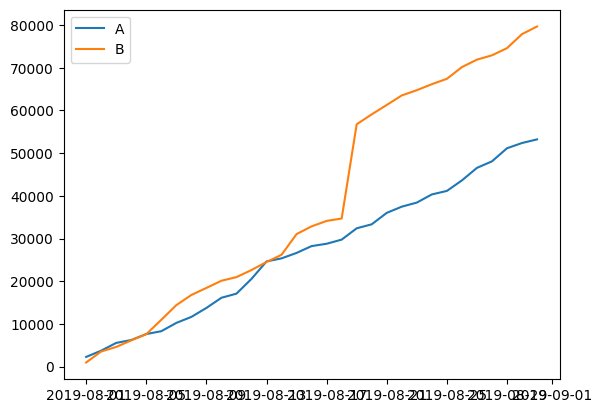

In [166]:
Acumulative_RevenueA=data_acumulativa[data_acumulativa['group']=='A'][['date','revenue', 'orders']]
Acumulative_RevenueB=data_acumulativa[data_acumulativa['group']=='B'][['date','revenue', 'orders']]
plt.plot(Acumulative_RevenueA['date'], Acumulative_RevenueA['revenue'], label='A')
plt.plot(Acumulative_RevenueB['date'], Acumulative_RevenueB['revenue'], label='B')
plt.legend()


Conclusiones : en el grafico se logra visualizar que el grupo B tiene unos mejores ingresos  que el grupo A y al final de la prueba como es mas grande la diferencia entre los dos grupos.

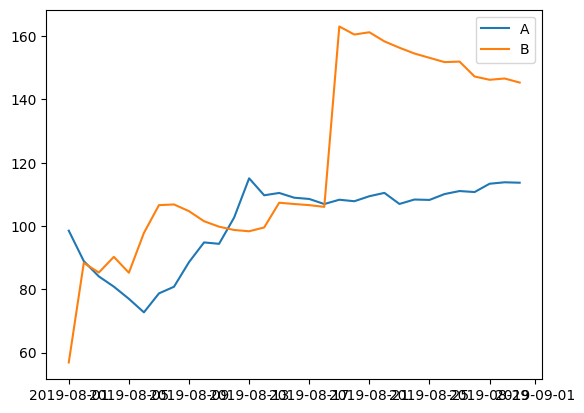

In [167]:
plt.plot(Acumulative_RevenueA['date'], Acumulative_RevenueA['revenue']/Acumulative_RevenueA['orders'], label='A')
plt.plot(Acumulative_RevenueB['date'], Acumulative_RevenueB['revenue']/Acumulative_RevenueB['orders'], label='B')
plt.legend()

Conclusiones : atraves de este en el grafico se logra visualizar como el grupo B tiene una tendencia creciente en sus ingresos con un pico  hacia la mitad de la prueba , mientras que el grupo A tambien tiene un poco y luego cae un poco hacia mitad de la prueba 

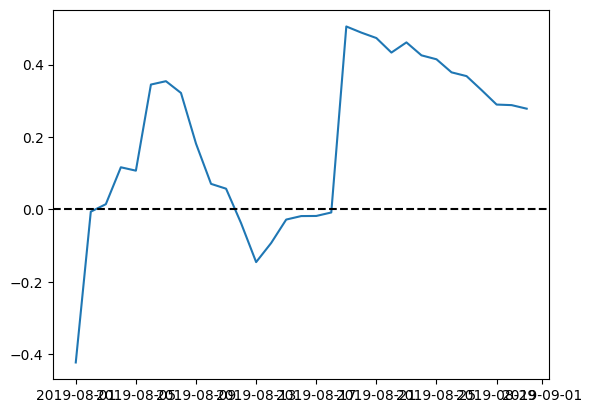

In [168]:
UnionCumulativeRevenue = Acumulative_RevenueA.merge(Acumulative_RevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(UnionCumulativeRevenue['date'], (UnionCumulativeRevenue['revenueB']/UnionCumulativeRevenue['ordersB'])/(UnionCumulativeRevenue['revenueA']/UnionCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

Conclusiones: En el grafico de logra visualizar como hay grandes diferencias entre las  pruebas en varios puntos la tendencia es creciente 

(18109.0, 18140.0, 0.0, 0.05)

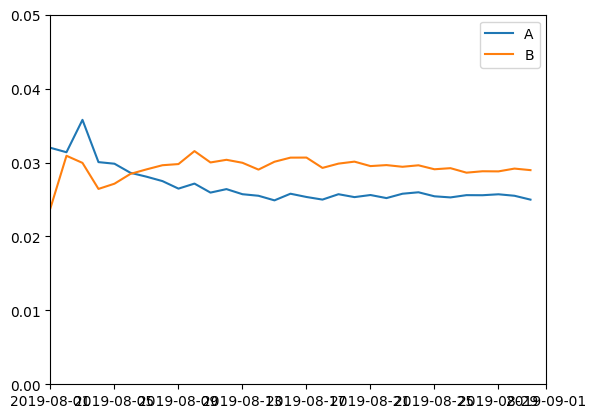

In [169]:
data_acumulativa['conversion'] = data_acumulativa['orders']/data_acumulativa['visitors']

data_acumulativaA = data_acumulativa[data_acumulativa['group']=='A']


data_acumulativaB = data_acumulativa[data_acumulativa['group']=='B']


plt.plot(data_acumulativaA['date'],data_acumulativaA['conversion'], label='A')
plt.plot(data_acumulativaB['date'], data_acumulativaB['conversion'], label='B')
plt.legend()


plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0,0.05])

Conclusiones: se logra observar la simetria de las dos pruebas y vemos la tasa de conversion que han tenido picos pero luego se estabilizan los valores para las dos pruebas 

(18109.0, 18140.0, -0.5, 0.5)

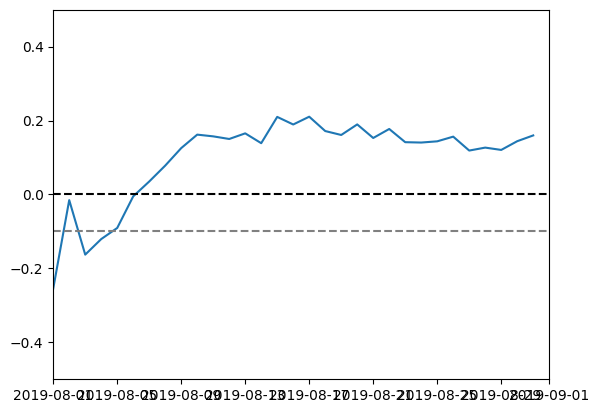

In [170]:
UnionCumulativeConversions = data_acumulativaA[['date','conversion']].merge(data_acumulativaB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(UnionCumulativeConversions['date'], UnionCumulativeConversions['conversionB']/UnionCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.5, 0.5])

Conclusiones : la grafica muestra que han habido grandes cambios repentinos por los que se deberia verificar si existen compras anomalas

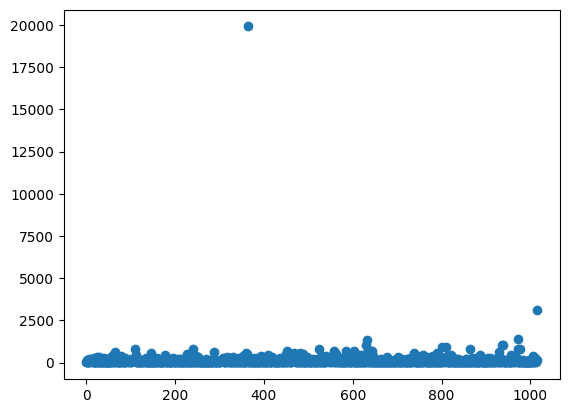

In [171]:
values = pd.Series(range(0, len(data_orders['revenue'])))
plt.scatter(values, data_orders['revenue'])

    Conclusiones: Acorde al grafico podemos concluir que los valores anomalos empiezan desde $2500 a $20000

In [172]:
print(np.percentile(data_orders['revenue'], [90, 95, 99]))

[280.8   414.275 830.3  ]


Conclusiones: podemos concluir que no mas del 5 % de los pedidos cuesta mas de $415

In [173]:
orders_ByUsers = (
    data_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

orders_ByUsers.columns = ['visitorId', 'orders']

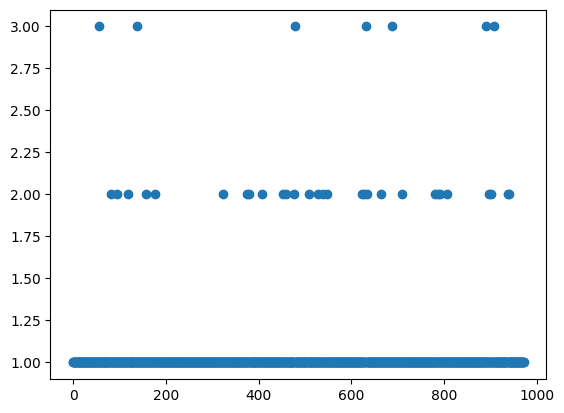

In [174]:
values = pd.Series(range(0,len(orders_ByUsers)))

plt.scatter(values, orders_ByUsers['orders'])

Conclusiones : hay demasiados usuarios con 2 o mas pedidos acorde al grafico

In [175]:
print(np.percentile(orders_ByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


Conclusiones: Podemos concluir que nos mas del 1% realizan mas de dos pedidos 

In [176]:
orders_ByUsersA = data_orders[data_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_ByUsersA.columns = ['visitorId', 'orders']

orders_ByUsersB = data_orders[data_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_ByUsersB.columns = ['visitorId', 'orders']

In [177]:
muestraA=pd.concat([orders_ByUsersA['orders'],pd.Series(0,index=np.arange(data_visitor[data_visitor['group']=='A']['visits'].sum()-len(orders_ByUsersA['orders'])),name='orders')],axis=0)
muestraB=pd.concat([orders_ByUsersB['orders'],pd.Series(0,index=np.arange(data_visitor[data_visitor['group']=='B']['visits'].sum()-len(orders_ByUsersB['orders'])),name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(muestraA, muestraB)[1]))
print("{0:.3f}".format(muestraB.mean()/muestraA.mean()-1))

0.011
0.160


Conclusiones: Vemos que la primera salida nos da inferior a 0.05% que podria ser motivo de rechazo de la hipotesis , mientras que la segunda salida nos no da una significacia estadistica del 16% acorde a lo conversion entre los dos grupos   

In [178]:
print('{0:.3f}'.format(stats.mannwhitneyu(data_orders[data_orders['group']=='A']['revenue'], data_orders[data_orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(data_orders[data_orders['group']=='B']['revenue'].mean()/data_orders[data_orders['group']=='A']['revenue'].mean()-1))

0.862
0.278


Conclusiones: No nos da motivo para rechazar la hipotesis nula  debido a que es mayor a 0.05

In [179]:
usersWithManyOrders = pd.concat([orders_ByUsersA[orders_ByUsersA['orders'] > 2]['visitorId'], orders_ByUsersB[orders_ByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = data_orders[data_orders['revenue'] > 2500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

33       249864742
58       611059232
365     1920142716
1015    2108080724
211     2108163459
Name: visitorId, dtype: int64
(9,)


conclusiones: En total, tenemos 9 usuarios anómalos.

In [180]:
sampleAFiltered = pd.concat([orders_ByUsersA[np.logical_not(orders_ByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data_visitor[data_visitor['group']=='A']['visits'].sum() - len(orders_ByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([orders_ByUsersB[np.logical_not(orders_ByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data_visitor[data_visitor['group']=='B']['visits'].sum() - len(orders_ByUsersB['orders'])),name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00960
0.181


Conclusiones: Podemos Inferir que el segmento B es mucho mejor que el segmento A

In [181]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    data_orders[np.logical_and(
        data_orders['group']=='A',
        np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    data_orders[np.logical_and(
        data_orders['group']=='B',
        np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    data_orders[np.logical_and(data_orders['group']=='B',np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    data_orders[np.logical_and(
        data_orders['group']=='A',
        np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.673
-0.091


Eliminar los datos atipicos si disminuyo ahora la diferencia de los segmentos es del 9 %

CONCLUSIONES: Decimos parar la prueba debidoara la prueba debido a  que no hay diferencia entre los grupos